In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numba import njit

In [42]:
@njit
def build_matrix_a(vec,h_grid=1):
    length=len(vec)
    ret_val=np.zeros((length,length))
    for i in range(length):
        for j in range( length):
            if i==j:
                ret_val[i,j]=-(2*vec[i]+vec[(i-1)*(i-1>=0)]+vec[(i+1)*(i+1<=length-1)+(i+1>length-1)*(length-1)])/2/h_grid**2   
            elif abs(i-j)==1:
                ret_val[i,j]=(vec[i]+vec[j])/2/h_grid**2
    return ret_val
                
def build_matrix_q(vec_mat, step, h_grid=1):
    next_pixel = np.roll(vec_mat, 1)
    previus_pixel = np.roll(vec_mat, -1)
    l_upper = - step * (vec_mat + previus_pixel) / (2 * h_grid ** 2)
    l_diagonal = 1 + step * (2 * vec_mat + next_pixel + previus_pixel) / (2 * h_grid ** 2)
    l_lower = - step * (vec_mat + next_pixel) / (2 * h_grid ** 2)

    return np.array(l_upper[:-1]), np.array(l_diagonal), np.array(l_lower[1:])


In [43]:
# @njit
def central_gradient_1d(vec,h_grid=1):
    padded_vec=np.pad(vec,1)
    ret_val=padded_vec
    for i in range(1,len(padded_vec)-1):
        ret_val[i]=(ret_val[i+1]-ret_val[i-1])/(2*h_grid)
    
    return ret_val[1:-1]


# # @njit
# def central_gradient_1d(vec,h_grid=1):
#     padded_vec=np.pad(vec,1)
#     ret_val=padded_vec
#     for i in range(1,len(padded_vec)-1):
#         ret_val[i]=(ret_val[i+1]+ret_val[i-1]-2*ret_val[i])/(2*h_grid**2)
    
#     return ret_val[1:-1]

In [44]:
def aosSemiExplicit_1d(vec,lamb,n_iteration,step=.25,h_grid=1):
    l_vec=len(vec)
    eye_vec=np.eye(l_vec)
    state=vec.copy()
#     grad_1d=central_gradient_1d(state,h_grid)
    
    for _ in range(n_iteration):
#         grad_1d=.5*((np.roll(state,1)-state)**2+(np.roll(state,-1)-state)**2)
        grad_1d=central_gradient_1d(state)
        g_current_iter=diffusivity(grad_1d,lamb)
        upper,diagonal,lower=build_matrix_q(g_current_iter,step)
        state=thomas(upper,diagonal,lower,state)
#         state=state +ans
    return state


In [45]:
def diffusivity(mat,lamb):
    ret_val=1-np.exp(-3.315/(mat/lamb)**4)
    ret_val[mat<=0]=1
    return ret_val


In [46]:
def ar1_source(size=100,rho=.8):
    ret_val=np.zeros(size)
    for i in range(1,size):
        ret_val[i]=ret_val[i-1]*rho+np.random.randn()
    return ret_val

In [47]:

def thomas(a,b,c,d):
    n = len(d)
    w= np.zeros(n-1,float)
    g= np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]
    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

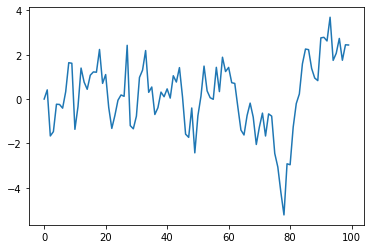

In [48]:
a=ar1_source()
plt.plot(a)


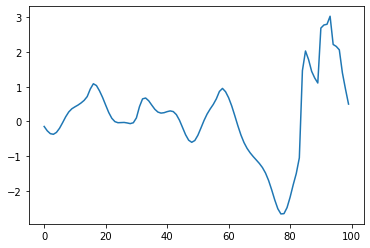

In [58]:
aa=aosSemiExplicit_1d(a,.2,10,step=.5)
plt.figure()
plt.plot(aa)

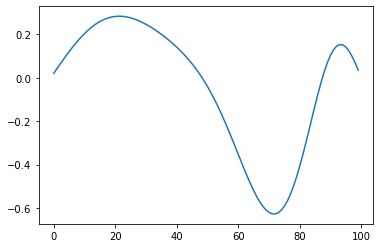

In [60]:
aa=aosSemiExplicit_1d(a,.2,200,step=.5)
plt.figure()
plt.plot(aa)

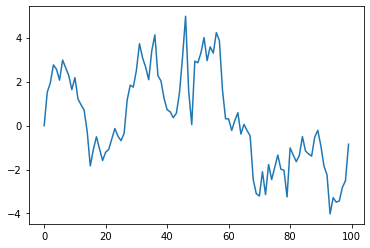

In [32]:
plt.plot(a)